<a href="https://colab.research.google.com/github/Rk-Pudasaini/Applied_Machine_Learning/blob/main/Logistic_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression


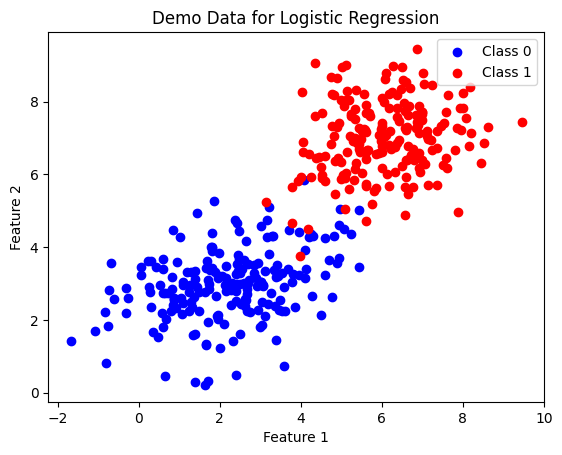

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples for each class
num_samples = 200

# Class 0
mu_class0 = [2, 3]  # Mean
cov_class0 = [[2, 0.5], [0.5, 1]]  # Covariance matrix
class0_data = np.random.multivariate_normal(mu_class0, cov_class0, num_samples)

# Class 1
mu_class1 = [6, 7]  # Mean
cov_class1 = [[1.5, 0.3], [0.3, 1]]  # Covariance matrix
class1_data = np.random.multivariate_normal(mu_class1, cov_class1, num_samples)

# Concatenate the data
X = np.concatenate((class0_data, class1_data))
y = np.concatenate((np.zeros(num_samples), np.ones(num_samples)))

# Plot the data
plt.scatter(class0_data[:, 0], class0_data[:, 1], color='blue', label='Class 0')
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Demo Data for Logistic Regression')
plt.legend()
plt.show()


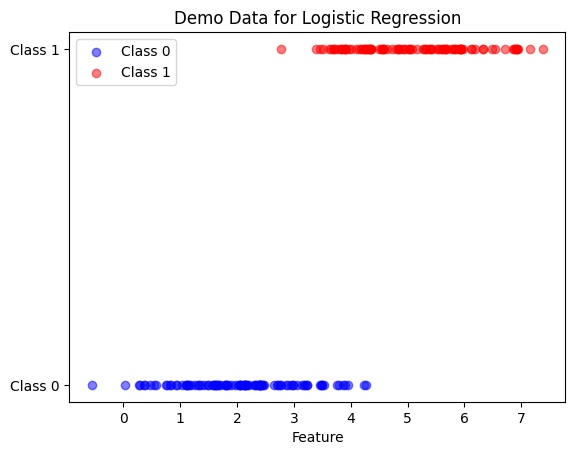

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Number of samples for each class
num_samples = 100

# Class 0
class0_data = np.random.normal(loc=2, scale=1, size=(num_samples, 1))

# Class 1
class1_data = np.random.normal(loc=5, scale=1, size=(num_samples, 1))

# Concatenate the data
X = np.concatenate((class0_data, class1_data))
y = np.concatenate((np.zeros(num_samples), np.ones(num_samples)))

# Plot the data
plt.scatter(class0_data, np.zeros_like(class0_data), color='blue', label='Class 0', alpha=0.5)
plt.scatter(class1_data, np.ones_like(class1_data), color='red', label='Class 1', alpha=0.5)
plt.xlabel('Feature')
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.title('Demo Data for Logistic Regression')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

class LogisticRegression:
    """
    This is a scratch implementation of Logistic Regression.
    """
    def __init__(self, X, y):
        self.params = {}
        self.m, self.n = X.shape
        self.params['W'] = np.random.randn(self.n, 1) * 0.001
        self.params['b'] = np.zeros(1)

        self.X = X
        self.y = y
        self.result = pd.DataFrame()

    def train(self, alpha=0.001, epochs=10):
        for epoch in range(epochs):
            print("Epoch:", epoch, end="")
            z = np.dot(self.X, self.params['W']) + self.params['b']

            self.y_pred = self.sigmoid(z)
            self.result[0] = self.y

            # Update the parameters
            self.params['W'] -= alpha * 1/self.m * np.dot(self.X.T, (self.y_pred - self.y.reshape(-1, 1)))
            self.params['b'] -= alpha * 1/self.m * np.sum(self.y_pred - self.y)

            self.y_pred = self.sigmoid(np.dot(self.X, self.params['W']) + self.params['b'])
            loss = self.loss(self.y, self.y_pred)

            self.result[1] = self.y_pred
            print(", loss =", loss)

        print("\nFinal Loss is", loss)
        print("Coefficients are:\nW: {}, b = {}".format(self.params['W'], self.params['b']))

    @staticmethod
    def loss(y, y_pred):
        y_zero_loss = y.T.dot(np.log(y_pred))
        y_one_loss = (1 - y).T.dot(np.log(1 - y_pred))

        return -np.sum(y_zero_loss + y_one_loss) / len(y)

    @staticmethod
    def sigmoid(z):
        return 1.0 / (1 + np.exp(-z))

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.params['W']) + self.params['b'])

def generate_data(no_of_data=100, no_of_features=4, seed=11):
    np.random.seed(seed)
    features, target = make_classification(n_samples=no_of_data,
                                            n_features=no_of_features,
                                            n_classes=2,
                                            random_state=seed)

    return features, target

from sklearn.datasets import make_classification

# Set hyperparameters
SEED = 11
alpha = 0.1
epochs = 100

# Generate synthetic data
no_of_data = 100
no_of_features = 4
X, y = generate_data(no_of_data, no_of_features, SEED)

# Train the logistic regression model
log_model = LogisticRegression(X, y)
log_model.train(alpha, epochs)


Epoch: 0, loss = 0.653148388501481
Epoch: 1, loss = 0.6162219058632786
Epoch: 2, loss = 0.5840514635721861
Epoch: 3, loss = 0.556702549078598
Epoch: 4, loss = 0.5346502595322689
Epoch: 5, loss = 0.5185432248029531
Epoch: 6, loss = 0.5093541270677119
Epoch: 7, loss = 0.5060564774793991
Epoch: 8, loss = 0.5079244257400525
Epoch: 9, loss = 0.5079948913613164
Epoch: 10, loss = 0.5059155170483947
Epoch: 11, loss = 0.4934307297097101
Epoch: 12, loss = 0.4772806294397023
Epoch: 13, loss = 0.45303694419800444
Epoch: 14, loss = 0.428935598909298
Epoch: 15, loss = 0.4028338810665511
Epoch: 16, loss = 0.3794181375209672
Epoch: 17, loss = 0.3579087346183034
Epoch: 18, loss = 0.3398638374369955
Epoch: 19, loss = 0.32486033045980733
Epoch: 20, loss = 0.3128094472749639
Epoch: 21, loss = 0.3031366814373356
Epoch: 22, loss = 0.29527697470715064
Epoch: 23, loss = 0.28870440335642206
Epoch: 24, loss = 0.2830002530241626
Epoch: 25, loss = 0.27788056204366546
Epoch: 26, loss = 0.2731641902994831
Epoch: 27

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

SEED = 11

np.random.seed(SEED)

def initialize_parameters(num_features):
    W = np.random.randn(num_features, 1) * 0.001
    b = np.zeros(1)
    return W, b

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    y_zero_loss = y.T.dot(np.log(y_pred))
    y_one_loss = (1 - y).T.dot(np.log(1 - y_pred))
    return -np.sum(y_zero_loss + y_one_loss) / len(y)

def train(X, y, W, b, alpha=0.001, epochs=10):
    m = X.shape[0]
    for epoch in range(epochs):
        z = np.dot(X, W) + b
        y_pred = sigmoid(z)

        W -= alpha * (1/m) * np.dot(X.T, (y_pred - y))
        b -= alpha * (1/m) * np.sum(y_pred - y)

        loss = compute_loss(y, y_pred)
        print("Epoch: {}, Loss: {:.4f}".format(epoch, loss))

    return W, b

def predict(X, W, b):
    z = np.dot(X, W) + b
    return sigmoid(z)

def generate_data(no_of_data=100, no_of_features=4):
    X, y = make_classification(n_samples=no_of_data,
                                n_features=no_of_features,
                                n_classes=2,
                                random_state=SEED)
    y = y.reshape(-1, 1)  # Reshape y to column vector
    return X, y

# Example usage:
no_of_data = 1000
no_of_features = 4
X, y = generate_data(no_of_data, no_of_features)
W, b = initialize_parameters(no_of_features)
W, b = train(X, y, W, b, alpha=0.1, epochs=100)


Epoch: 0, Loss: 0.6940
Epoch: 1, Loss: 0.6564
Epoch: 2, Loss: 0.6237
Epoch: 3, Loss: 0.5954
Epoch: 4, Loss: 0.5706
Epoch: 5, Loss: 0.5490
Epoch: 6, Loss: 0.5298
Epoch: 7, Loss: 0.5129
Epoch: 8, Loss: 0.4978
Epoch: 9, Loss: 0.4843
Epoch: 10, Loss: 0.4721
Epoch: 11, Loss: 0.4611
Epoch: 12, Loss: 0.4511
Epoch: 13, Loss: 0.4420
Epoch: 14, Loss: 0.4336
Epoch: 15, Loss: 0.4259
Epoch: 16, Loss: 0.4189
Epoch: 17, Loss: 0.4123
Epoch: 18, Loss: 0.4063
Epoch: 19, Loss: 0.4006
Epoch: 20, Loss: 0.3954
Epoch: 21, Loss: 0.3905
Epoch: 22, Loss: 0.3859
Epoch: 23, Loss: 0.3816
Epoch: 24, Loss: 0.3775
Epoch: 25, Loss: 0.3737
Epoch: 26, Loss: 0.3701
Epoch: 27, Loss: 0.3668
Epoch: 28, Loss: 0.3635
Epoch: 29, Loss: 0.3605
Epoch: 30, Loss: 0.3576
Epoch: 31, Loss: 0.3549
Epoch: 32, Loss: 0.3523
Epoch: 33, Loss: 0.3498
Epoch: 34, Loss: 0.3475
Epoch: 35, Loss: 0.3452
Epoch: 36, Loss: 0.3431
Epoch: 37, Loss: 0.3410
Epoch: 38, Loss: 0.3391
Epoch: 39, Loss: 0.3372
Epoch: 40, Loss: 0.3354
Epoch: 41, Loss: 0.3337
Ep

# Using Functions


In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []

    #Sigmoid method
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    def feed_forward(self,X):
        z = np.dot(X, self.weights) + self.bias
        A = self._sigmoid(z)
        return A

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            self.losses.append(compute_loss(y,A))
            dz = A - y # derivative of sigmoid and bce X.T*(A-y)
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(dz)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]

        return np.array(y_predicted_cls)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
cm ,accuracy,sens,precision,f_score  = confusion_matrix(np.asarray(y_test), np.asarray(predictions))
print("Test accuracy: {0:.3f}".format(accuracy))
print("Confusion Matrix:",np.array(cm))